# Implementación de los polinomios de Taylor

Serie de Taylor
$$f(t)=f(t_0)+f^{(1)}(t_0)(t-t_0)+\frac{f^{(2)}(t_0)}{2!}(t-t_0)^2+\cdots +\frac{f^{(n)}(t_0)}{n!}(t-t_0)^n+\cdots$$

$$f(t)=\cos(t)$$
$$f(t)=f(t_0)+f^{(1)}(t_0)(t-t_0)+\frac{f^{(2)}(t_0)}{2!}(t-t_0)^2+\cdots +\frac{f^{(n)}(t_0)}{n!}(t-t_0)^n+\cdots$$

*Función con dos o más parametros*

In [1]:
include("Taylor0.jl")
using AT
f1(t,x,y)=y
f2(t,x,y)=-ω²*x       #Oscilador armónico
f3(t,x,y)=ω²*sin(x)  #ecuación del péndulo
using PyPlot

## Para desplazamientos pequeños $x\approx\sin(x)$

In [6]:
ω²=1.0 #coeficiente de f2
x0=0.01 #condición inicial en x(desplazamiento pequeño)
y0=0.0 #condición inicial en la derivada de x
t0=0.0
tf=100.0  #tiempo final de 100 segundos
N=25
ϵ=1e-52
h=0.01
t1,x1,y1=metRungeKutta2(f1,f2,t0,tf,x0,y0,h)
t,x,y=integrador(f1,f2,x0,y0,t0,tf,ϵ,N)
t[1]

0.0

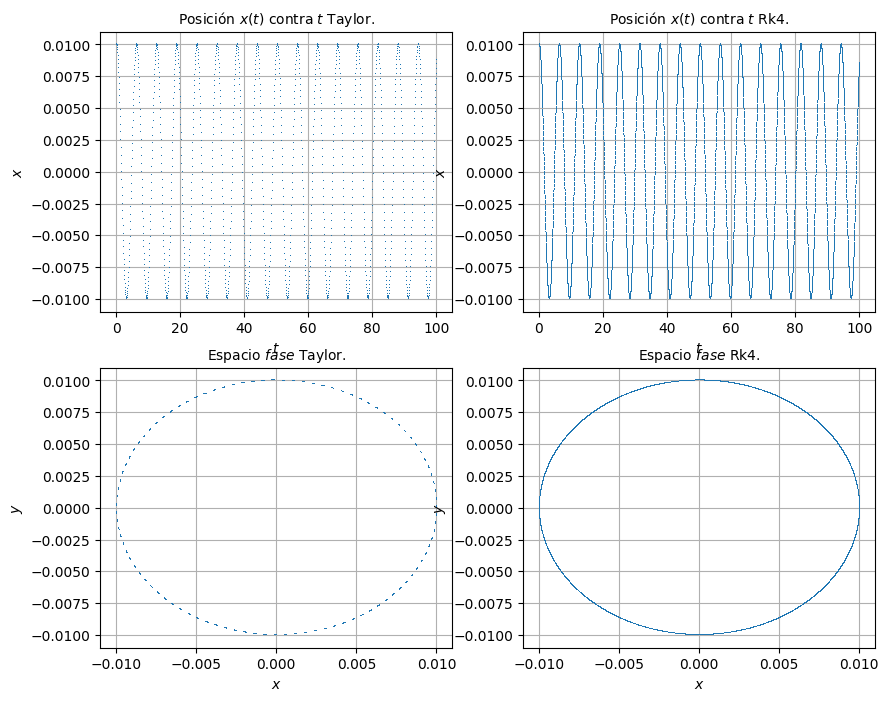

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f496d82af10>

In [11]:
fig = figure(figsize = (10, 8))
ax = subplot(221);title(L"Posición $x(t)$ contra $t$ Taylor.", fontsize=10)
xlabel(L"$t$");ylabel(L"$x$");grid(); 
bx = subplot(222);title(L"Posición $x(t)$ contra $t$ Rk4.", fontsize=10)
xlabel(L"$t$");ylabel(L"$x$");grid();
ay = subplot(223);title(L"Espacio $fase$ Taylor.", fontsize=10)
xlabel(L"$x$");ylabel(L"$y$");grid();
by = subplot(224);title(L"Espacio $fase$ Rk4.", fontsize=10)
xlabel(L"$x$");ylabel(L"$y$");grid();
ax[:plot](t, x,","); bx[:plot](t1, x1,",")
ay[:plot](x, y,",");by[:plot](x1, y1,",")


***Comparo las últimas gráficas con la función analítica***

$$\ddot{x}=-x\hspace{0.5cm}\Rightarrow\ddot{x}+x=0\hspace{0.5cm}\mbox{como }\ddot{x}+\omega^2x=0$$
$$\Rightarrow \:\:x(t)=A\sin\left(\omega t +\phi\right)\hspace{1.5cm}\dot{x}(0)=A\omega\cos\left(\omega t +\phi\right)$$
Con las condiciones iniciales $x(0)=0.01$ y $\dot{x}(0)=0.0$

$$\begin{array}{l}
   A\sin\left(\phi\right)=0.01\\
   A\omega\cos\left(\phi\right)=0
\end{array}\hspace{1cm}\Rightarrow\phi=\frac{\pi}{2}\hspace{.3cm}A=0.01\hspace{1cm}x(t)=0.01\cos\left(t\right)\hspace{.3cm}\dot{x}(t)=-0.01\sin\left(t\right)$$


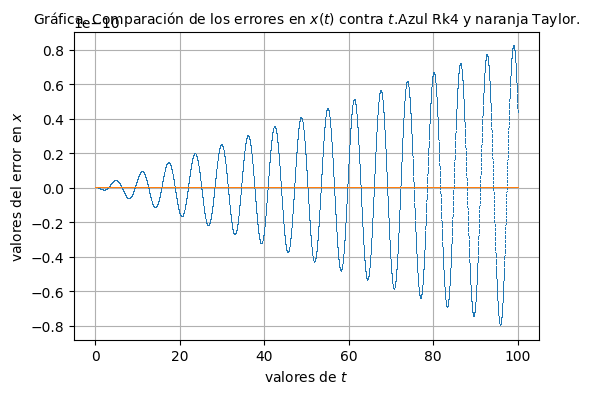

In [12]:
F(t)=0.01*cos(t)
dF(t)=-0.01*sin(t)
xan=F.(t);yan=dF.(t)
xan1=F.(t1);yan1=dF.(t1)
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(t1,xan1-x1,",")
plot(t,xan-x,",")
title(L"Gráfica. Comparación de los errores en $x(t)$ contra $t$.Azul Rk4 y naranja Taylor.", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores del error en $x$")
grid()

*El método de Taylor es mucho más exacto.*

## Ahora la prueba fundamental es comparar la ecuación $\ddot{x}=-\sin(x)$

In [16]:
ω²=-1.0
x0=0.01 #desplazamiento pequeño
y0=0.0 #condición inicial en la derivada de x
t0=0.0
tf=10.0  #tiempo final de 100 segundos
N=25
ϵ=1e-52
h=0.01
sint1,sinx1,siny1=metRungeKutta2(f1,f3,t0,tf,x0,y0,h)
sint,sinx,siny=integrador(f1,f3,x0,y0,t0,tf,ϵ,N)

([0.0,0.0311938,0.0692179,0.107258,0.145328,0.183441,0.221614,0.259864,0.298215,0.336693  …  9.67942,9.71775,9.75621,9.79483,9.83364,9.87272,9.91215,9.9518,9.99141,10.031],[0.01,0.00999514,0.00997605,0.00994253,0.00989458,0.00983222,0.00975544,0.00966425,0.00955863,0.00943853  …  -0.00967754,-0.00957389,-0.00945577,-0.0093231,-0.00917573,-0.0090134,-0.00883565,-0.00864307,-0.00843715,-0.00821814],[0.0,-0.000311887,-0.000691627,-0.00107053,-0.00144817,-0.00182414,-0.00219804,-0.00256949,-0.00293814,-0.00330367  …  0.00251897,0.00288802,0.00325399,0.00361661,0.00397568,0.00433113,0.00468309,0.00502965,0.00536792,0.00569756])

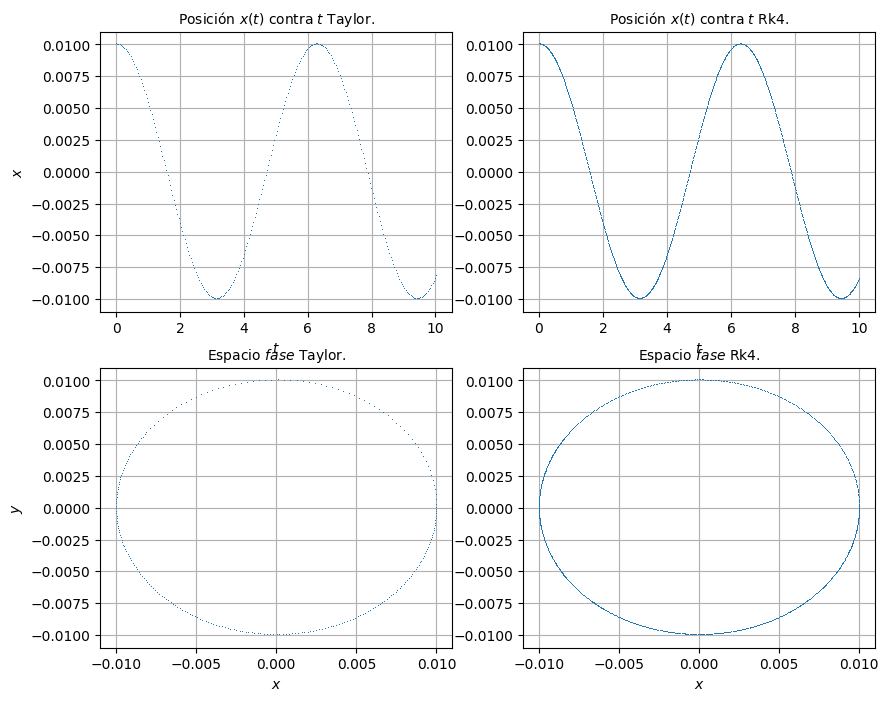

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4962662c90>

In [20]:
fig = figure(figsize = (10, 8))
ax = subplot(221);title(L"Posición $x(t)$ contra $t$ Taylor.", fontsize=10)
xlabel(L"$t$");ylabel(L"$x$");grid(); 
bx = subplot(222);title(L"Posición $x(t)$ contra $t$ Rk4.", fontsize=10)
grid();xlabel(L"$t$");
ay = subplot(223);title(L"Espacio $fase$ Taylor.", fontsize=10)
xlabel(L"$x$");ylabel(L"$y$");grid();
by = subplot(224);title(L"Espacio $fase$ Rk4.", fontsize=10)
grid();xlabel(L"$x$");
ax[:plot](sint, sinx,","); bx[:plot](sint1, sinx1,",")
ay[:plot](sinx, siny,",");by[:plot](sinx1, siny1,",")

# [Oscilador Paramétrico](https://en.wikipedia.org/wiki/Parametric_oscillator)

Serie de Taylor
$$f(x)=f(a)+f^{(1)}(a)(x-a)+\frac{f^{(2)}(a)}{2!}(x-a)^2+\cdots +\frac{f^{(n)}(a)}{n!}(x-a)^n+\cdots$$

Tenemos que resolver la ecuación
$$\ddot{x}=\left(\alpha+\beta\cos t\right)\sin x$$

In [1]:
include("Taylor0.jl")
using AT
f1(t,x,y)=y
f4(t,x,y)=(α+β*cos(t))*sin(x) #Oscilador paramétrico
using PyPlot

In [22]:
α=0.0  #costante α=1
β=1.0  #costante α=1
x0=.01 #condición inicial en x(desplazamiento pequeño)
y0=0.0 #condición inicial en la derivada de x
t0=0.0
tf=4.0  #tiempo final alrededodr de 2 periodos
N=25
ϵ=1e-52
t,x,y=integrador(f1,f4,x0,y0,t0,tf,ϵ,N)

([0.0,0.0311938,0.0692098,0.10721,0.145183,0.183118,0.221007,0.258842,0.296617,0.334331  …  3.84702,3.86524,3.88349,3.9018,3.92022,3.93881,3.95778,3.97683,3.99588,4.01421],[0.01,0.0100049,0.010024,0.0100575,0.0101056,0.0101681,0.0102452,0.0103369,0.0104431,0.0105641  …  0.234372,0.238678,0.243071,0.247559,0.252155,0.256885,0.2618,0.266832,0.27196,0.276988],[0.0,0.000311988,0.00069265,0.00107415,0.00145693,0.00184143,0.0022281,0.00261742,0.00300986,0.00340594  …  0.234158,0.238468,0.242865,0.247356,0.251957,0.25669,0.261609,0.266644,0.271776,0.276807])

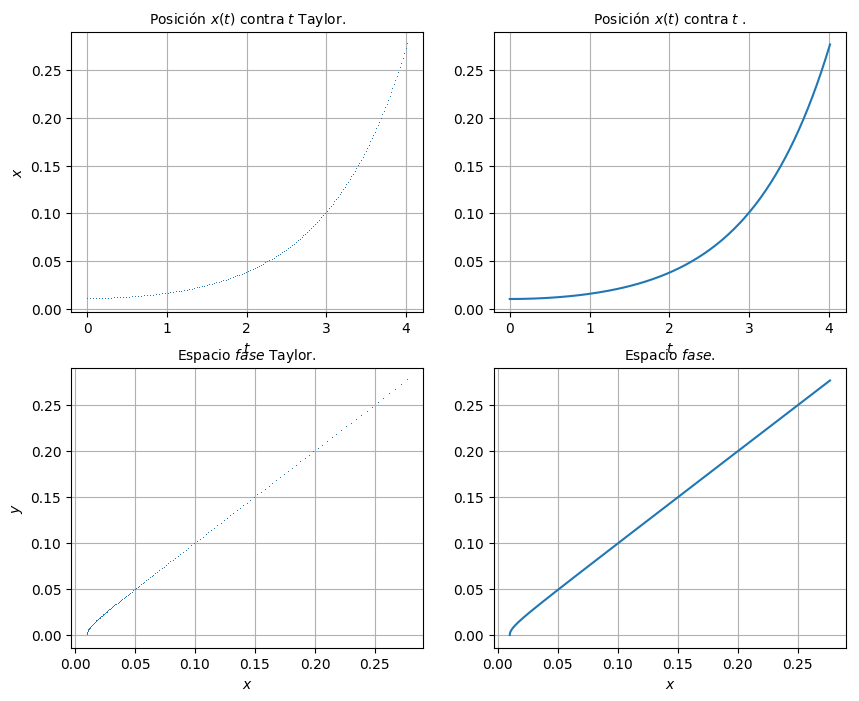

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f847cd1cd10>

In [23]:
fig = figure(figsize = (10, 8))
ax = subplot(221);title(L"Posición $x(t)$ contra $t$ Taylor.", fontsize=10)
xlabel(L"$t$");ylabel(L"$x$");grid(); 
bx = subplot(222);title(L"Posición $x(t)$ contra $t$ .", fontsize=10)
grid();xlabel(L"$t$");
ay = subplot(223);title(L"Espacio $fase$ Taylor.", fontsize=10)
xlabel(L"$x$");ylabel(L"$y$");grid();
by = subplot(224);title(L"Espacio $fase$.", fontsize=10)
grid();xlabel(L"$x$");
ax[:plot](t, x,","); bx[:plot](t, x)
ay[:plot](x, y,",");by[:plot](x, y)